# AnomalyDetection_5_MovingAverage_Refinement

**Updates from previous notebook:** 
- this notebook aims to add the features in the conclusion of "AnomalyDetection_4_MovingAverage"
   

## Libraries and Configuration

In [1]:
""" Libraries """

#file / system libraries 
import os
import datetime as dt

# mathematical 

from numpy.fft import ifft
from numpy.fft import fft
import numpy as np

# data exploration

import pandas as pd

# data visualization

import matplotlib.pyplot as plt

""" Configuration """

# pandas 

pd.set_option('display.max_columns', None)

## Data

In [2]:
base = '/Users/yousefnami/KinKeepers/ProjectAI/Kin-Keepers/Data/{}'
names = ['rohan','ignacio']
end_labels = ['_filtered.csv']
dfs = []

for index,name in enumerate(names):
    dfs.append(pd.read_csv(base.format(names[index]+end_labels[0]),index_col = 0))

In [3]:
dfs[0].head()

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal
220,2020-09-14 19:19:26,0.01,0.02,0.00,3.62,1.04,1.38,1,0.022361,4.011284
319,2020-09-14 19:20:39,0.09,0.16,0.14,36.11,25.84,67.85,1,0.230868,81.087978
320,2020-09-14 19:20:40,0.09,0.16,0.09,22.98,15.43,16.45,1,0.204450,32.198879
321,2020-09-14 19:20:41,0.05,0.07,0.09,22.98,15.43,16.45,1,0.124499,32.198879
322,2020-09-14 19:20:42,0.12,0.07,0.07,29.44,39.83,27.27,1,0.155563,56.540210


In [4]:
dfs[1].head()

,date,accX,accY,accZ,gyrX,gyrY,gyrZ,files,accTotal,gyrTotal
0,2020-09-13 17:09:25,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784
1,2020-09-13 17:09:26,0.02,0.12,0.03,1.47,3.32,2.22,1,0.125300,4.255784
2,2020-09-13 17:09:27,0.01,0.01,0.00,7.43,6.82,10.10,1,0.014142,14.273307
12,2020-09-13 17:09:34,0.01,0.01,0.00,6.64,7.07,12.45,1,0.014142,15.782173
13,2020-09-13 17:09:34,0.01,0.01,0.00,4.12,3.61,5.81,1,0.014142,7.985149


In [15]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

class moving_avg:

    """
    a class used to store a moving average values, parameters and methods
    
    Dependencies:
    -------------
    import datetime as dt
    import numpy as np
    import matplotlib.pyplot as plt
    
    Attributes:
    -----------
    
    data ( class var ): [*[*float]]
        stores all the datapoints for each window
        
    time_frame_start ( class var ): [datetime]
        the start of the moving average window
    
    time_stamps ( class var ): [*[*datetime]]
        stores the timestamps for each data point within it's window
        
    averages ( class var ): [*float]
        stores the values of the moving average for each window    
        
    time_frame ( optional - 5 ): int
        the length of the moving window in units of hours
        
    weight ( optional - (0.0, 0.75) ): (float, float)
        weight to apply to numbers greater than the specified quartile
    
        
    Methods:
    --------
    __init__( self, time_frame = 5, weight = (0.0, 0.75)):
    initialises class based on inputs; converts 'time_frame' to seconds

    
    average( self ):
        calculates the averages for each moving window
        
    plot( self, figsize = (16,8), labels = ('gyrTotal', ' accTotal') ): 
        plots the averages against the start time of the moving moving
        
    """
    data = [[]]
    time_frame_start = []
    time_stamps = [[]]
    # note there is a danger in using class variables because they 'save' every instantiations values!
    
    def __init__( self, time_frame = 5, weight = (0.0, 0.75)):
        self.time_frame = time_frame*3600
        self.weight = weight
        self.averages = []

    def plot( self, figsize = (16,8), labels = ('gyrTotal', ' accTotal') ):
        averages = np.asarray(self.averages).reshape((-2,2))
        fig = plt.figure(figsize = figsize)
        for i in range(averages.shape[1]):
            fig.add_subplot(1,averages.shape[1],i+1)
            #plt.plot(self.time_frame_start,averages[:,i],'.')
            #plt.plot([j for j in range(len(self.time_frame_start))],averages[:,i],'.')
            
            plt.plot([j for j in range(averages.shape[0])],averages[:,i],'.')
            #plt.xticks(self.time_frame_start)
            plt.xlabel('date')
            plt.ylabel('average {}'.format(labels[i]))

        plt.show()


class average(moving_avg):
    """
    
    Dependencies:
    -------------
    moving_avg (class)
    
    Attributes:
    -----------
    
    datapoint: [*float]
        datapoint to be considered for averaging, length --> degrees of freedom
    
    time: str
        time data point is recorded in the format 'YYYY-mm-dd HH:MM:SS'
        
    Methods:
    --------
    
    __init__(self, datapoint, time):
        initilises class; converts time to datetime; stores new datapoint and time;
        if new time exceeds average window, creates new storage location
        
    """
    def average( self ):   
        for window in self.data:
            window = np.asarray(window).reshape(-2,2)
            self.averages.append([
                window[:,index].mean() for index in range(window.shape[1])
            ])
            
        if (len(self.averages) > 1):
            if (self.averages[-1][0] < 0.2*self.averages[-2][0]):
                print('risk')


    
    def __init__(self,datapoint,time):
        super().__init__() # is this necessary?

        self.datapoint = datapoint
        self.time_stamps[-1].append(dt.datetime.strptime(time,'%Y-%m-%d %H:%M:%S'))
        
        if not self.time_frame_start:
            self.time_frame_start.append(self.time_stamps[-1][-1])
        if (self.time_stamps[-1][-1] - self.time_frame_start[-1]).total_seconds() < self.time_frame:
            pass
        else:
            for i,time in enumerate(self.time_stamps[-1]):
                if time not in self.time_frame_start:
                    self.data.append(
                        self.data[-1][1:]
                    )

                    self.time_frame_start.append(time)
                    
            self.data.append([])
            
            
            
        self.data[-1].append([
            point for point in datapoint
        ]) # should account for the 'weights' that you've specified here, might require moving the average method
        
        self.average() # this average only needs to average the most recent index, otherwise your scripts will
        # take ages to complete
        
# what the class is still missing is the 'decision making process', so if an average is lower than 

## On read data

In [16]:
m_avg_instance = moving_avg()
for item in dfs[1][['gyrTotal','accTotal','date']].values.tolist():
    avg_instance = average(item[0:2],item[2])
m_avg_instance.average()
m_avg_instance.plot()



risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk


KeyboardInterrupt: 

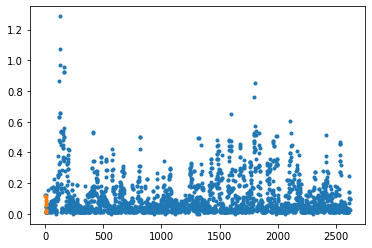

In [297]:
#dfs[0].reset_index(inplace = True)
#dfs[1].reset_index (inplace = True)
averages = np.asarray(m_avg_instance.averages).reshape(-2,2)

plt.plot(dfs[1].index,dfs[1].accTotal,'.')
plt.plot([i for i in range(len(m_avg_instance.averages))],averages[:,1],'.')


# does not seem to be working... the graphs seems to have just 'shifted place...' what is the meaning of this?
# this is very confusing, because it was working well earlier...

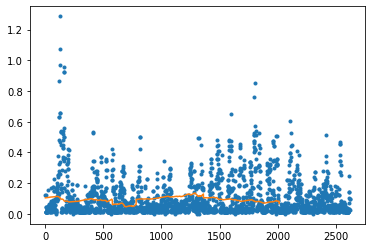

In [382]:
newinstance = moving_avg()
for item in dfs[1][['gyrTotal','accTotal','date']].values.tolist():
    avg_instance = average(item[0:2],item[2])

newinstance.average()

plt.plot(dfs[1].index,dfs[1][['gyrTotal','accTotal','date']].values[:,1],'.')

plt.plot([i for i in range(len(newinstance.averages))],np.asarray(newinstance.averages).reshape(-2,2)[:,1])

# Conclusion

The average class works, at least in determining the correct average.

There are some changes you need to make in terms of the actual class though, these are summarised below:
1. Currently, you cannot choose to plot the average, with the data points, or average on it's own
2. Currently, the average is calculated at the end, as opposed to at every stage (this was done to save memory, but when the model is deployed, you will need to calculate it every time)
3. You need to think about where everything will be stored, and how this will work in conjunction with Rohan's API (best wait for him to come back from holiday before starting this)
4. You need to account for the weightage when calculating the averages
5. You need to add meaningful xticks, in terms of date and time
6. You need to add functionality to be able to determine when there is a 'break' in the sequence (i.e. much lower values?)
7. You need to fix the way your class handles stuff in memory: it currently saves the values from previous instantiations as well